In [18]:
# Import the necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import seaborn as sns
#Ignore warnings.
import warnings
warnings.filterwarnings('ignore') 

In [19]:
# Read the data into a dataframe
data = pd.read_csv("loan.csv", header = 0)
#Determine rows and columns
data.shape


(39717, 111)

In [20]:
#DATA CLEANING
#1. NullValues
#2. Outliers
#3. Streamlining field values
#Determing the count of columns which have Null values. 
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [21]:
#Removing the columns which have all null values
loan_data=data.dropna(axis=1,how='all')

In [22]:
# Verifying the deletion of Columns, Out of 111 columns, only 57 columns have values
loan_data.shape

(39717, 57)

In [23]:
#Determing the row which have 1 or more null values 
loan_data.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [24]:

loan_data.drop(['title','emp_title','desc','mths_since_last_delinq','mths_since_last_record','last_pymnt_d','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1, inplace=True)

In [25]:
loan_data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
out_prnc

In [26]:
#Determing the columns having single value columns.
loan_data.nunique().sort_values()


acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_

In [27]:
#Removing columns having single value as it will not help in analysis
loan_data.drop(['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt','pymnt_plan'], axis=1, inplace=True)

In [28]:
#Removing irrelevant columns
#only keeping columns relevant as to identify these risky loan applicants.
loan_data.drop(["id", "member_id","url","funded_amnt",'out_prncp', 'out_prncp_inv','total_rec_int','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee'],axis=1,inplace=True)

In [29]:
#Removing irrelevant rows
#Concerned with Charged-off and Fully paidloans only.
loan_data = loan_data[loan_data.loan_status != 'Current']


In [30]:
#Rows with null values
loan_data.isnull().sum()


loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
last_pymnt_amnt            0
pub_rec_bankruptcies     697
dtype: int64

In [31]:
loan_data.dropna(subset=['emp_length','revol_util','pub_rec_bankruptcies'],inplace=True)

In [32]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt_inv       36800 non-null  float64
 2   term                  36800 non-null  object 
 3   int_rate              36800 non-null  object 
 4   installment           36800 non-null  float64
 5   grade                 36800 non-null  object 
 6   sub_grade             36800 non-null  object 
 7   emp_length            36800 non-null  object 
 8   home_ownership        36800 non-null  object 
 9   annual_inc            36800 non-null  float64
 10  verification_status   36800 non-null  object 
 11  issue_d               36800 non-null  object 
 12  loan_status           36800 non-null  object 
 13  purpose               36800 non-null  object 
 14  zip_code              36800 non-null  object 
 15  addr_state         

In [33]:
                                             #DATA FIXING

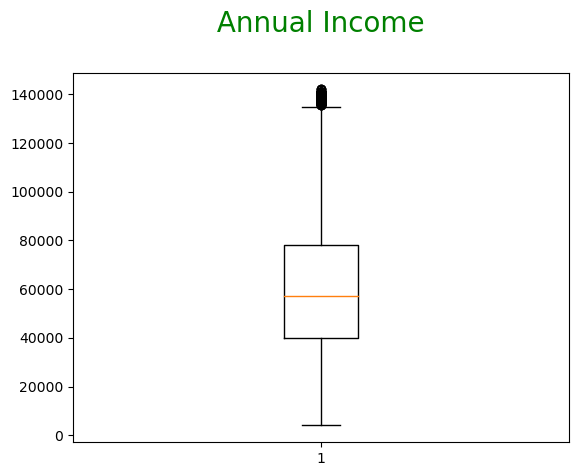

57000.0

In [35]:
limit = loan_data['annual_inc'].quantile(0.95)
valid_data = loan_data[loan_data['annual_inc'] < limit]
plt.title(" Annual Income \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.boxplot(valid_data.annual_inc)
plt.show()#after removing outliers
valid_data['annual_inc'].median()

In [41]:
#Observation->
#No outliers for loan amount,though there are some values far from distribution, it is continous distribution
#Most of annual income  is within 40000 till 75000
# high annual income is above 135000
# Median annual income is 56000

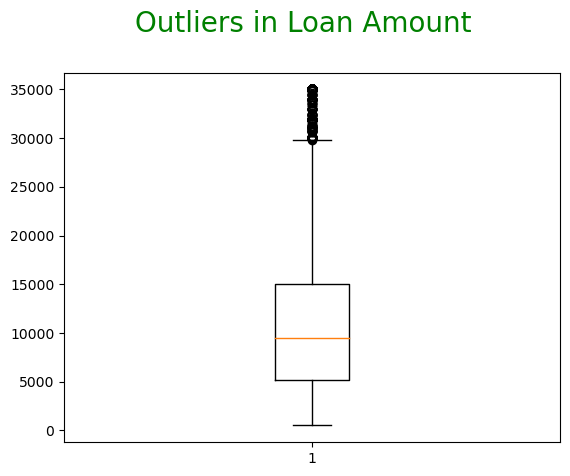

9500.0

In [42]:
plt.title("Outliers in Loan Amount  \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.boxplot(valid_data['loan_amnt'])
ax=plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.show()
valid_data['loan_amnt'].median()

In [43]:
#Observation->
#No outliers for loan amount,though there are some values far from distribution, it is continous distribution
#Most of loan amount iswithin 5000 till 15000
# Very few people took more than 3000000 loan amount.
# Median loan amount is 9500

In [44]:
                                        #UNIVARIATE ANALYSIS
    
#1. Issue Month and Year
#2. Duration for which loan was issued-Term
#3. Interest rate
#4. DTI
#5. Installment amount
#6. Public Record and Public Record Bankruptcy

In [102]:
#Determing the strong indicators of default cross refrencing values for Charged off loans
valid_data_charged=valid_data[valid_data['loan_status'] == 'Charged Off'].reset_index()


In [103]:
#removing % sign
valid_data_charged['int_rate']=valid_data_charged['int_rate'].str.strip('%')
valid_data_charged['revol_util']=valid_data_charged['revol_util'].str.strip('%')
valid_data_charged.int_rate=pd.to_numeric(valid_data_charged.int_rate)

In [104]:
#making issue date as date time
valid_data_charged['issue_d']=pd.to_datetime(valid_data_charged["issue_d"],format="%b-%y")
valid_data_charged['issue_d_yr']=pd.DatetimeIndex(valid_data_charged["issue_d"]).year
valid_data_charged['issue_d_mth']=pd.DatetimeIndex(valid_data_charged["issue_d"]).strftime('%b')


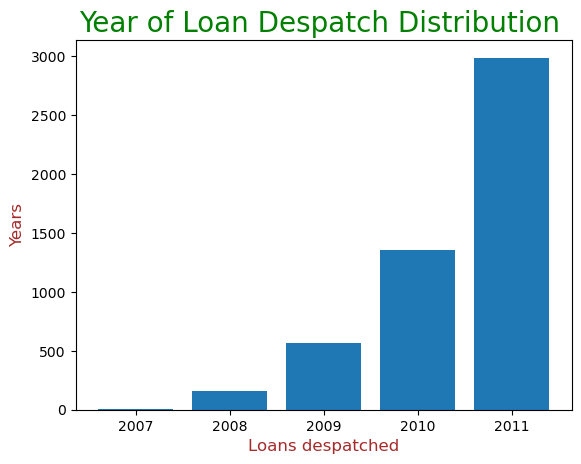

In [105]:
groupdata=valid_data_charged.groupby('issue_d_yr').count()
x_vals = []
y_vals=  []
for i in range(5): 
  
    y_vals.append(groupdata.iloc[i,0])
    x_vals.append(groupdata.index[i])
plt.bar(x_vals,y_vals)
plt.title("Year of Loan Despatch Distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loans despatched", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

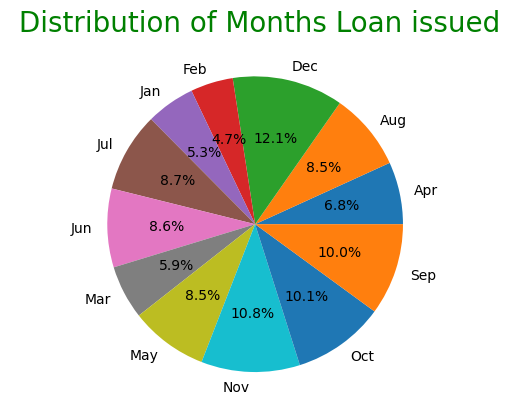

In [106]:
groupdata=valid_data_charged.groupby('issue_d_mth').count()
x_vals = []
y_vals=  []
for i in range(12): 
  
    y_vals.append(groupdata.iloc[i,0])
    x_vals.append(groupdata.index[i])
plt.pie(y_vals, labels=x_vals, autopct='%1.1f%%')
plt.title(" Distribution of Months Loan issued", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

#plt.xlabel("Loans despatched", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
#plt.ylabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [107]:
#Observations
#Maximum defaults have happened in last quarter of 2011 when most loans were issued.

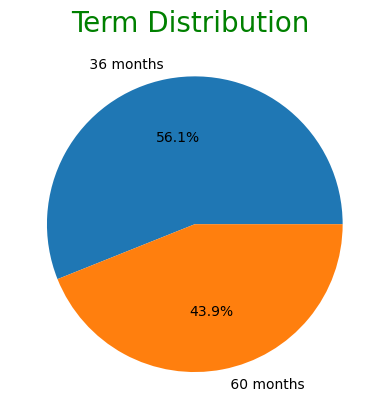

In [108]:
groupdata=valid_data_charged.groupby("term").count()
x_vals = []
y_vals = []
for i in range(2): 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])

plt.pie(y_vals, labels=x_vals, autopct='%1.1f%%')
# Adding and formatting title
plt.title("Term Distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [109]:
#Observation--> Most of loans have been for loans with term of 36 months


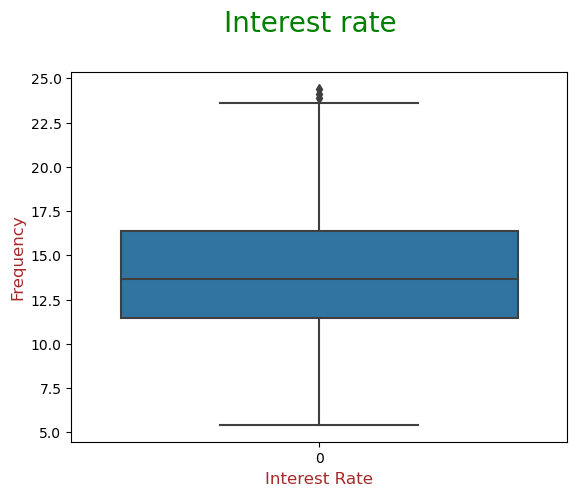

In [110]:
plt.title("Interest rate  \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.xlabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Frequency", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(data=valid_data_charged['int_rate'])
plt.show()
#valid_data['int_rate'].median
#valid_data_charged['int_rate'].median

In [111]:
#Observation--> 
#Most defaulters received interest at the rate of 11.5-17%  against median interest of all borrowers of 10%
#Some defaulters received loans at more than 22.5%

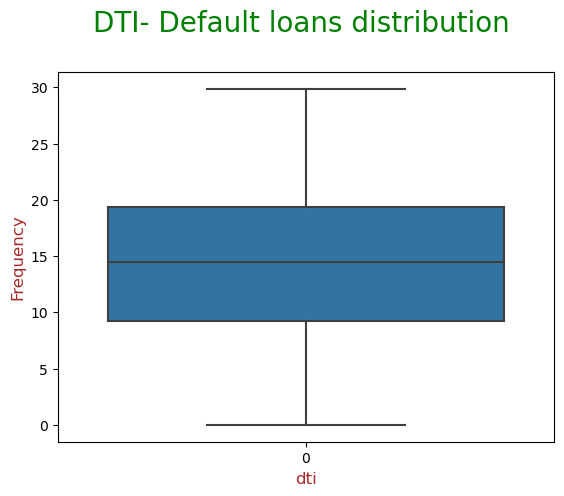

In [112]:
plt.title("DTI- Default loans distribution \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
sns.boxplot(data=valid_data_charged['dti'])
# Labeling Axes
plt.xlabel("dti", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Frequency", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [113]:
#Observation
#As per industry standard good DTI should be less than 36% ,since the dataset has max dti of 30% it is good.

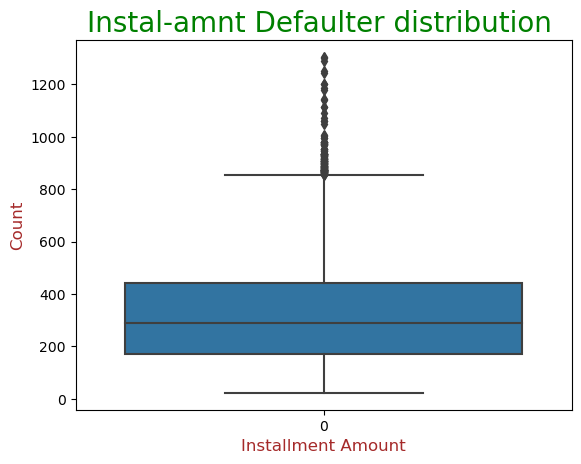

272.98

In [114]:

sns.boxplot(data=valid_data_charged['installment'])
plt.title("Instal-amnt Defaulter distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.xlabel("Installment Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()
valid_data.installment.median()

In [115]:
#Observation
# Median installment amount is 273. The installment amount is not impacted by charged off or fully paid borrowers.
# Most of installment amount is around median
# The defaulters had monthly installments between 145 and 410 approximately

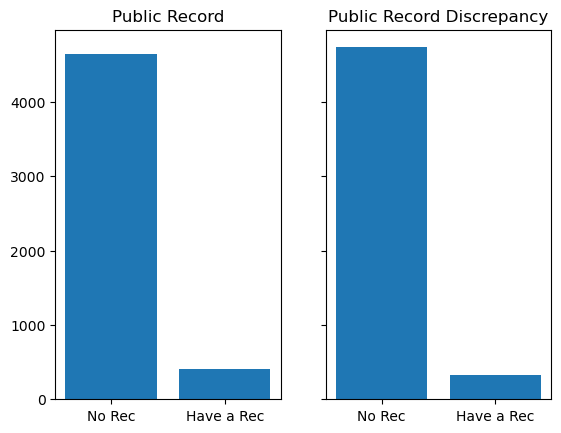

In [116]:
groupdata=valid_data_charged.groupby("pub_rec").count()
groupdata_dis=valid_data_charged.groupby("pub_rec_bankruptcies").count()
fig, ax =plt.subplots(nrows=1,ncols=2,sharey=True)
x_vals = ["No Rec","Have a Rec"]
y_vals = []
z_vals = []
for i in range(2): 
    y_vals.append(groupdata.iloc[i,0])
    z_vals.append(groupdata_dis.iloc[i,0])
ax[0].bar(x_vals,y_vals)
ax[1].bar(x_vals,z_vals)
ax[0].set_title('Public Record')
ax[1].set_title('Public Record Discrepancy')
plt.show()

In [117]:
#Observation
#96% people have not went bankrupt or have a disciplinary record . 

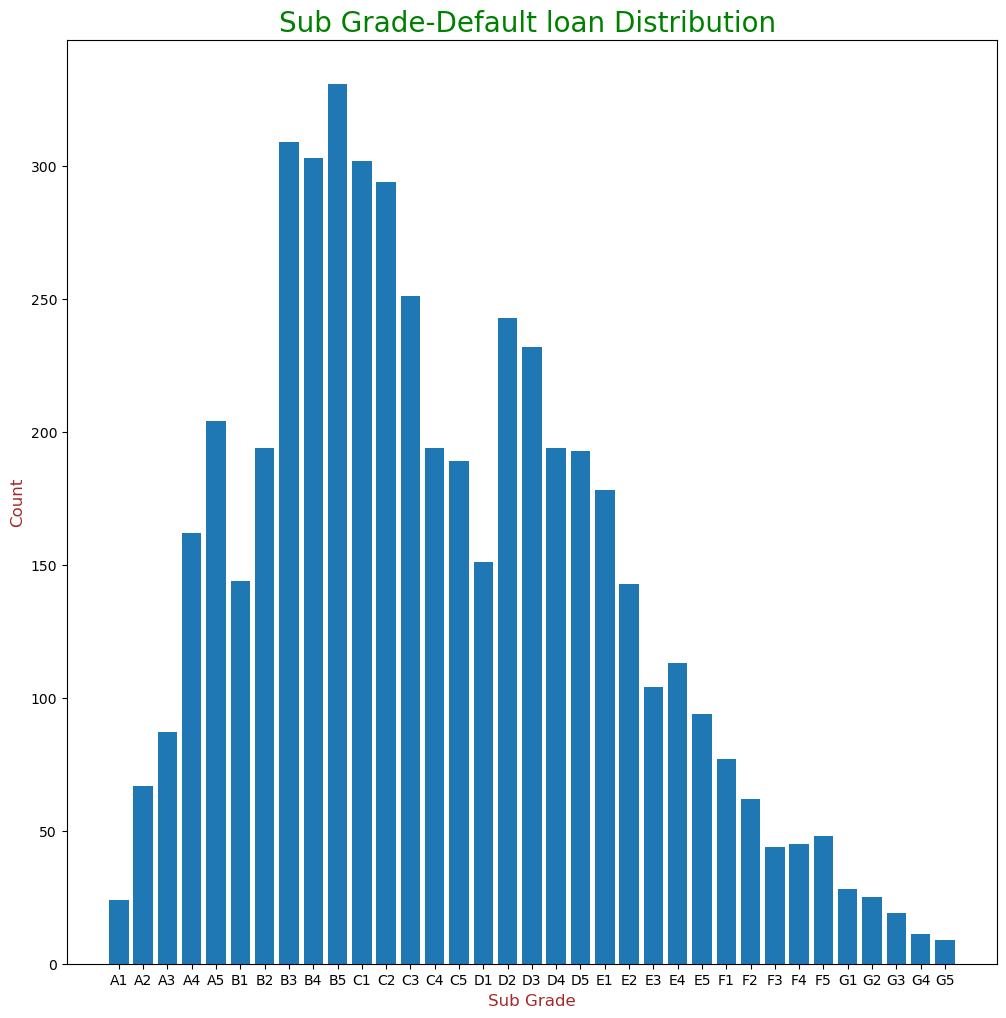

In [118]:
plt.figure(figsize=(12,12))
groupdata=valid_data_charged.groupby("sub_grade").count()
#loan_data['sub_grade'].nunique()
x_vals = []
y_vals = []
for i in range(35): 
   x_vals.append(groupdata.index[i])
   y_vals.append(groupdata.iloc[i,0])

plt.bar(x_vals,y_vals)
# Labeling Axes
plt.title("Sub Grade-Default loan Distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Sub Grade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [119]:
#Observation
#Most defaulters fall into grade B & C and Subgrade of C1 and B5. As most borrowers are from B grade.

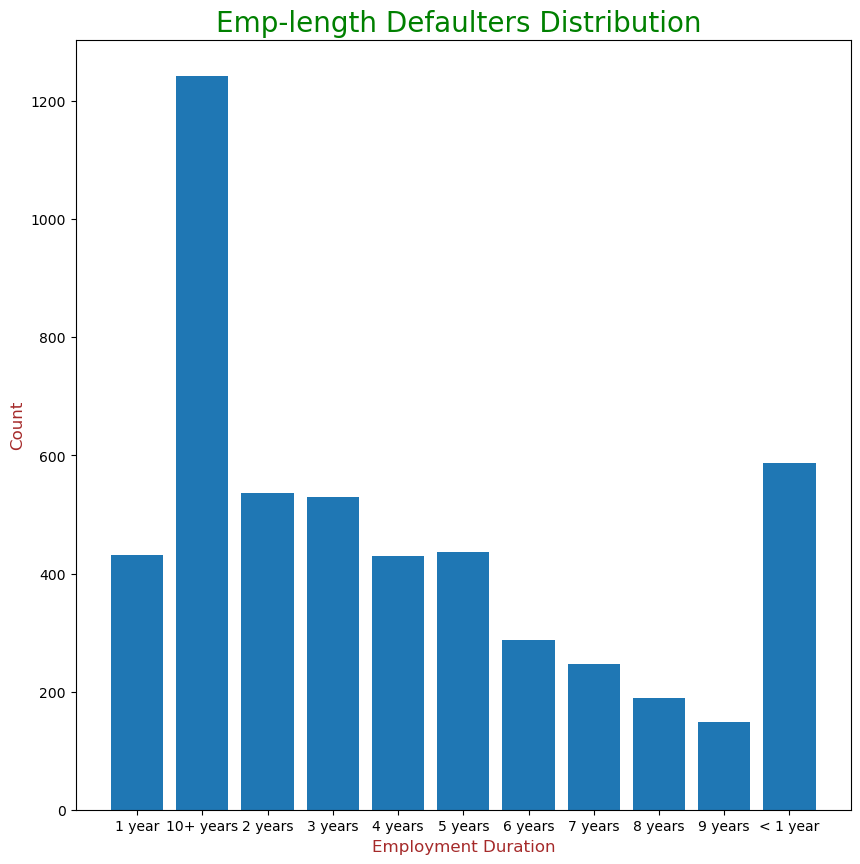

In [120]:
groupdata=valid_data_charged.groupby("emp_length").count()
plt.figure(figsize=(10,10))
x_vals = []
y_vals = []
for i in range(11): 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])

plt.bar(x_vals,y_vals)
# Labeling Axes
plt.title("Emp-length Defaulters Distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Employment Duration", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [121]:
#Observation
#Defaulters are mostly 10+ years emploment length or are some people having less than 1 year or 2 years of employement

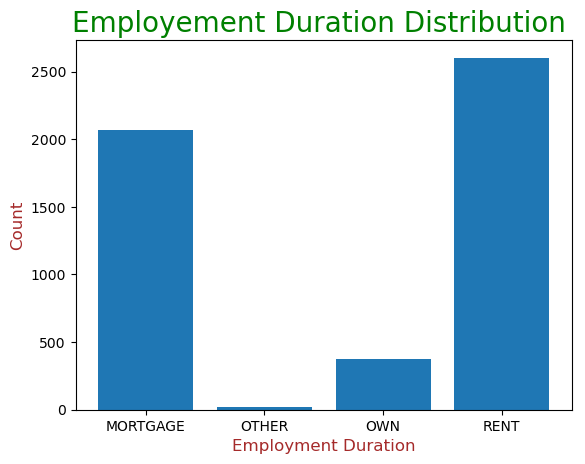

In [122]:
groupdata=valid_data_charged.groupby("home_ownership").count()
x_vals = []
y_vals = []
for i in range(4): 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])
plt.bar(x_vals,y_vals)    
# Labeling Axes
plt.title("Employement Duration Distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Employment Duration", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [123]:
#Observation
#Most of the defaulters are on rent.

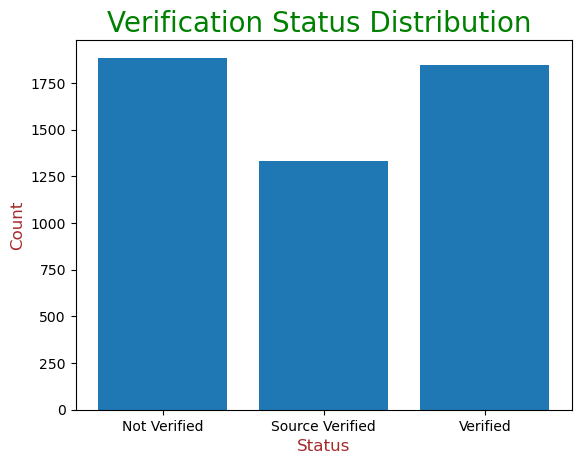

In [124]:
groupdata=valid_data_charged.groupby("verification_status").count()
x_vals = []
y_vals = []
for i in range(3): 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])
plt.bar(x_vals,y_vals)    
# Labeling Axes
plt.title("Verification Status Distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [125]:
#Observation
#Most of the loans were assigned without annual income verification. 

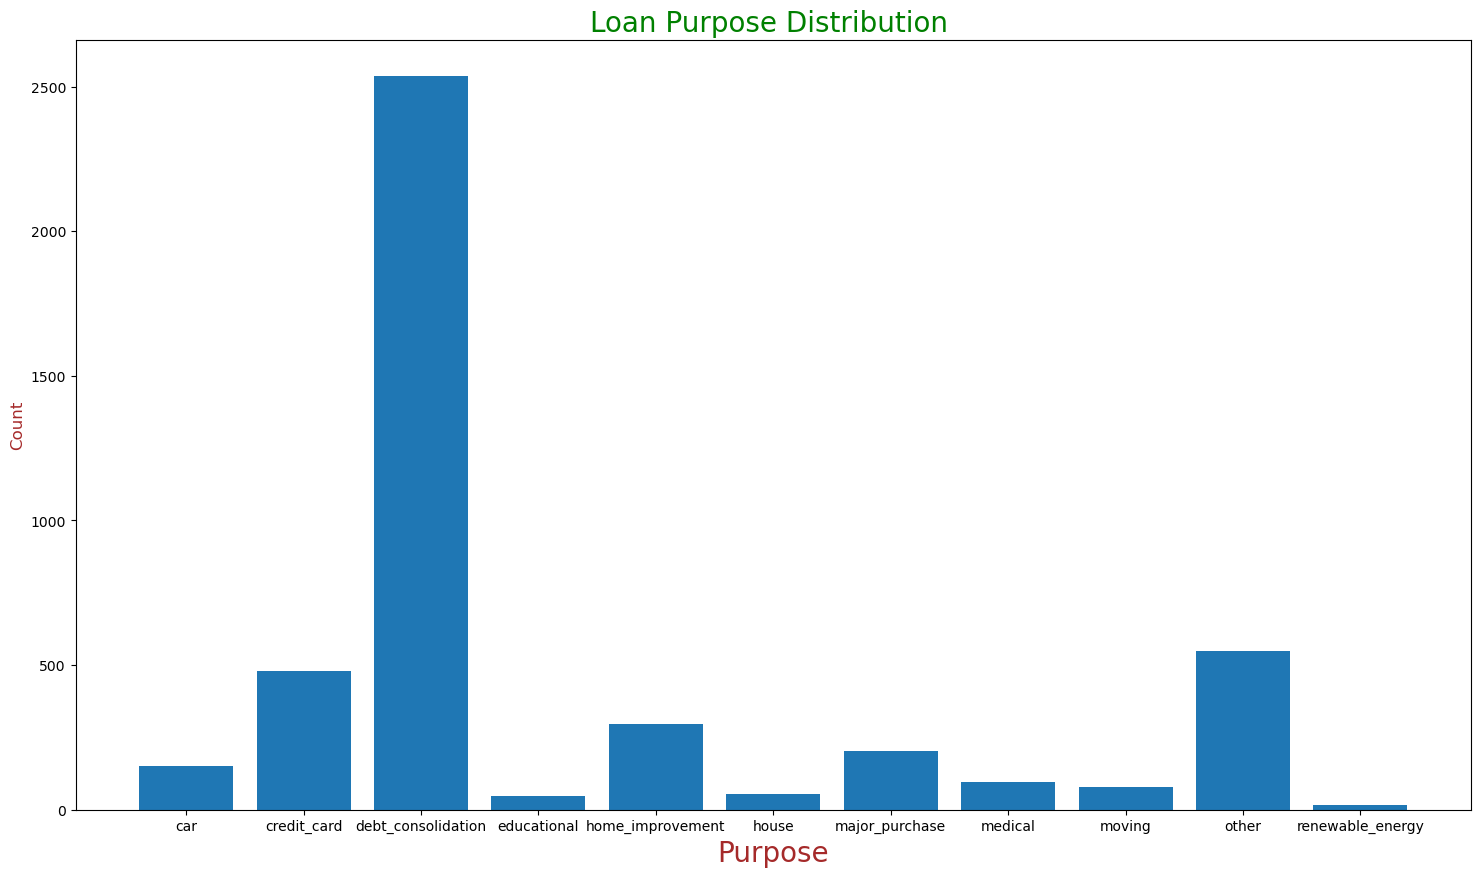

In [126]:
groupdata=valid_data_charged.groupby("purpose").count()
plt.figure(figsize=(18,10))
x_vals = []
y_vals = []
for i in range(11): 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])

plt.bar(x_vals,y_vals)
# Labeling Axes
plt.title("Loan Purpose Distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Purpose", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

In [127]:
#Observation
#Most of the Defaults were on loans taken to pay off existing loans or to pay of credit card debt

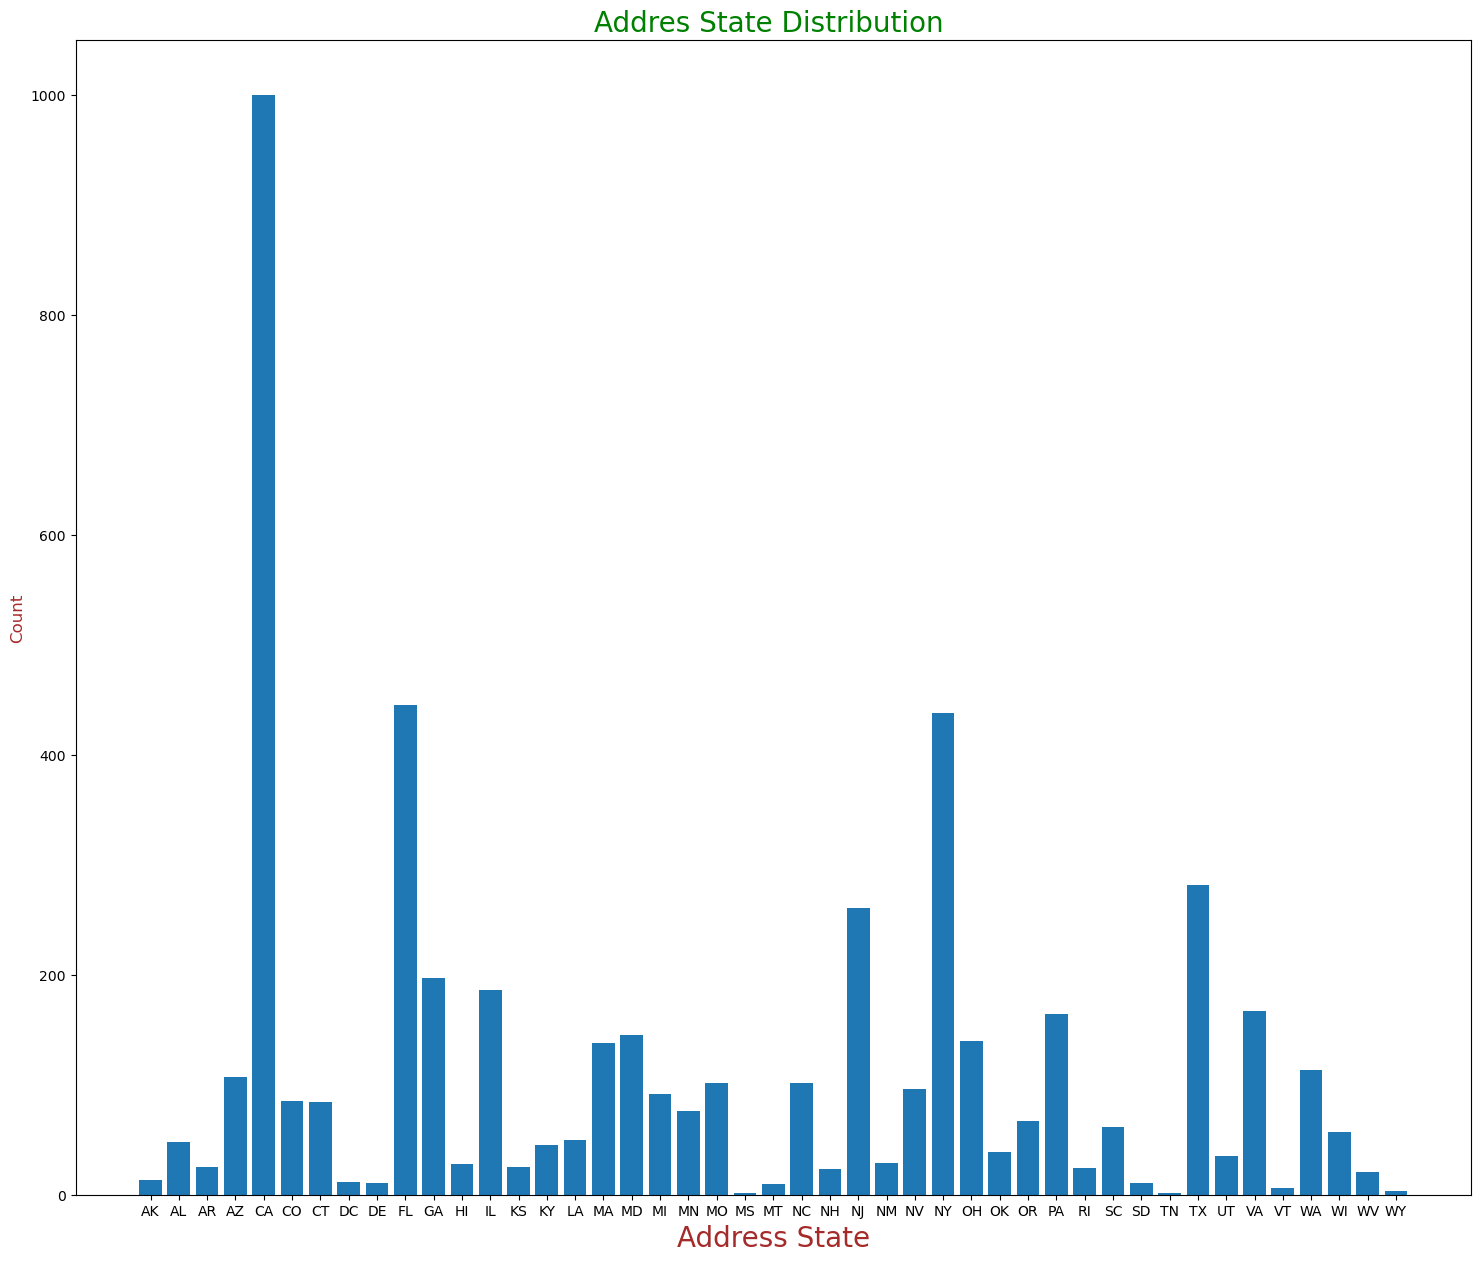

In [128]:
groupdata=valid_data_charged.groupby("addr_state").count()
plt.figure(figsize=(18,15))
x_vals = []
y_vals = []
for i in range(45): 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])

plt.bar(x_vals,y_vals)
# Labeling Axes
plt.title("Addres State Distribution ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Address State", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [129]:
#Observation
#Many of the defaulters are from CA and NY

In [130]:
                                                #BIVARIATE ANALYSIS


In [131]:
#Univariate analysis gave a picture of variables wrt Defaulted loans
#Bivariate analysis will particlarly call out scenarios which are indicator of Default.

#1. Annual income
#2. Interest rate
#3. Loan Amount


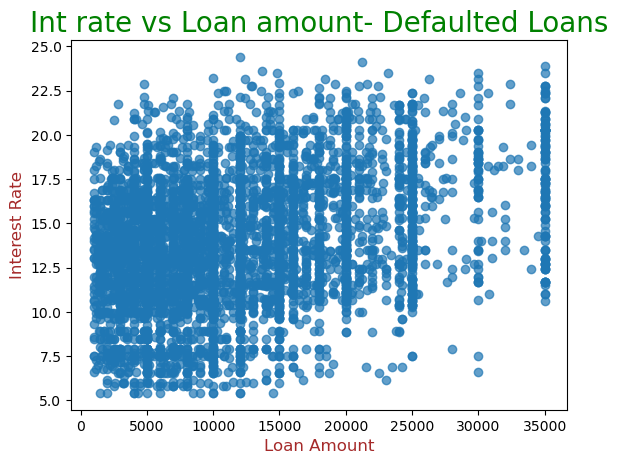

In [132]:
plt.scatter(valid_data_charged.loan_amnt, valid_data_charged.int_rate,alpha= 0.7)
# Adding and formatting title
plt.title("Int rate vs Loan amount- Defaulted Loans", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [133]:
#Observation
#Defaulters  taken a loan in the range 5k - 10k and are charged interest rate of 10-15 %

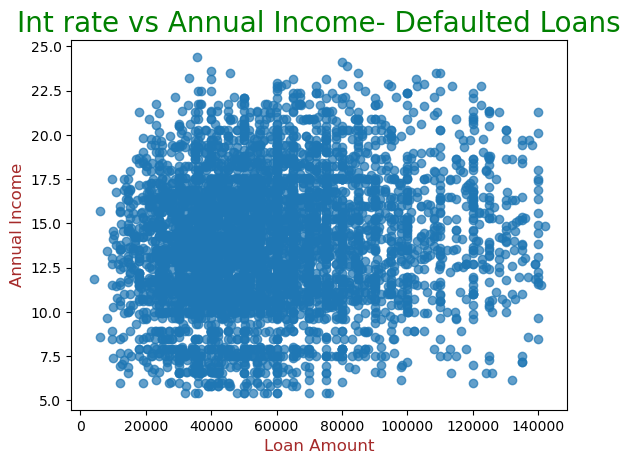

In [134]:
plt.scatter(valid_data_charged.annual_inc, valid_data_charged.int_rate,alpha= 0.7)
# Adding and formatting title
plt.title("Int rate vs Annual Income- Defaulted Loans", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [135]:
#Observation
#There is not specific pattern found in interest rate and Loan amount
#Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k


<Figure size 1000x1000 with 0 Axes>

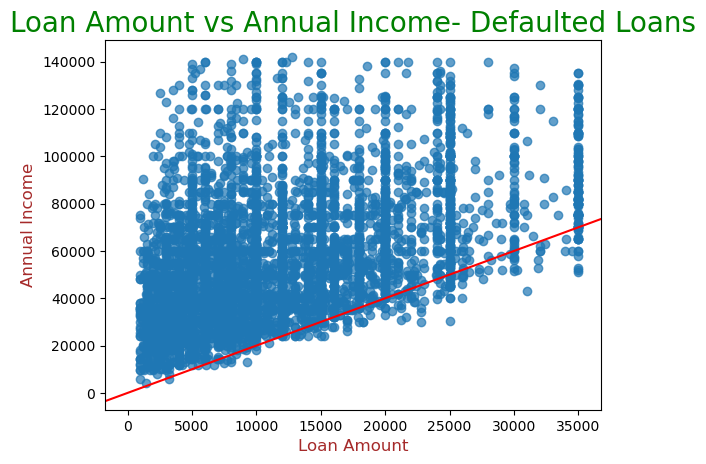

In [136]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.scatter(valid_data_charged.loan_amnt,valid_data_charged.annual_inc, alpha= 0.7)
ax.axline((0, 0), slope=2,color='r')
# Adding and formatting title
plt.title("Loan Amount vs Annual Income- Defaulted Loans", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [137]:
#Observation 
#There is linear relationship between annual income and loan amount 
# For loan amount between 0-15000 , more people took out loan. 
# Only high income people with salary higher than 23500 took more than 30000 loan amount.
# Once income crosses the median annual income of 57000 ,less likely people are to go for loans exceeding 25000
# People crossing 100000 rarely took loans of less than 5000
# People within income range 120000-140000 seldomly took loans crossing 25000

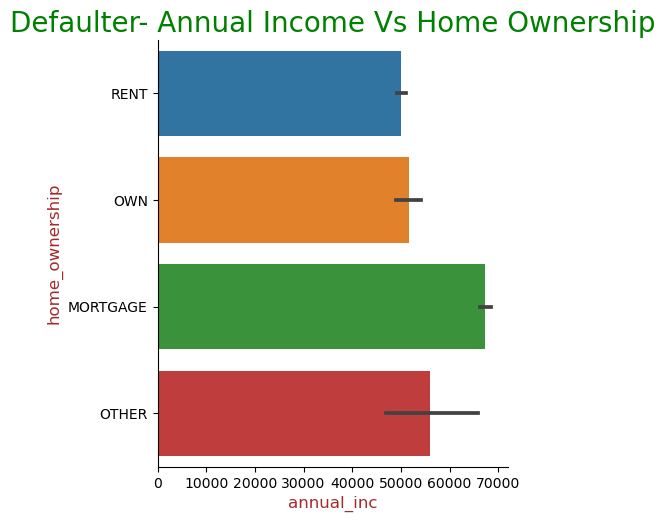

In [138]:
sns.catplot(y = 'home_ownership', x = 'annual_inc', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter- Annual Income Vs Home Ownership", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("home_ownership", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("annual_inc", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [139]:
#Observations
#Most Defaulters whose home ownership is 'MORTGAGE and have income of 65-70k

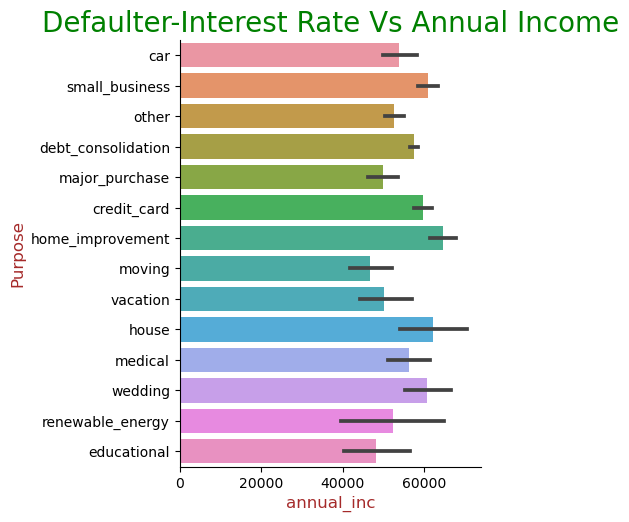

In [140]:
sns.catplot(y = 'purpose', x = 'annual_inc', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Interest Rate Vs Annual Income", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("annual_inc", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [141]:
#Observation
#Most defaulters are taking loan for 'home improvement' and have income of 60k -70k

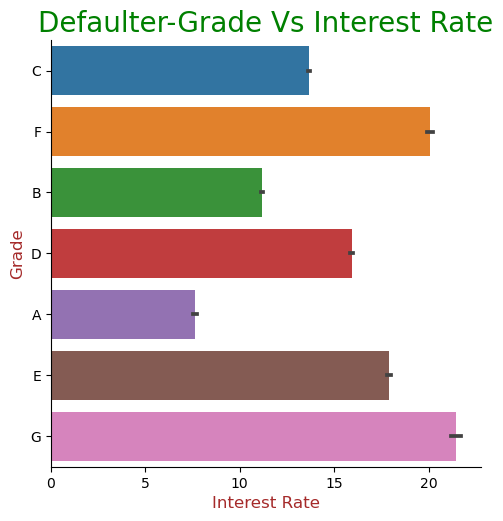

In [142]:
sns.catplot(y = 'grade', x = 'int_rate', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Grade Vs Interest Rate", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Grade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [143]:
#Observation
#Most defaulters are grade G employees and have loans at interest rate above 20% 

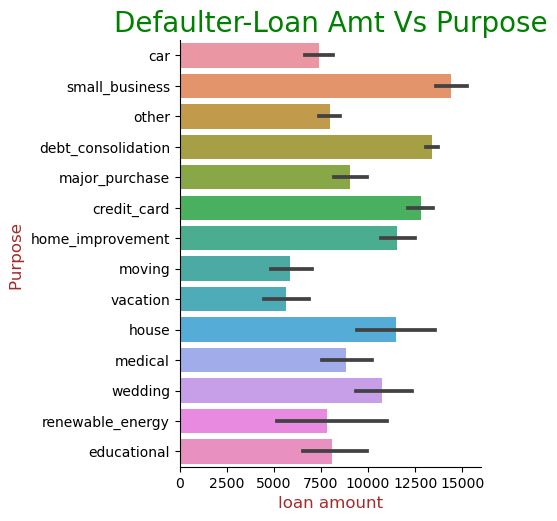

In [144]:
sns.catplot(y = 'purpose', x = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Purpose", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Purpose ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [145]:
#Observations
##Most defaulters took loan had small business' and loan was upwards of 12500

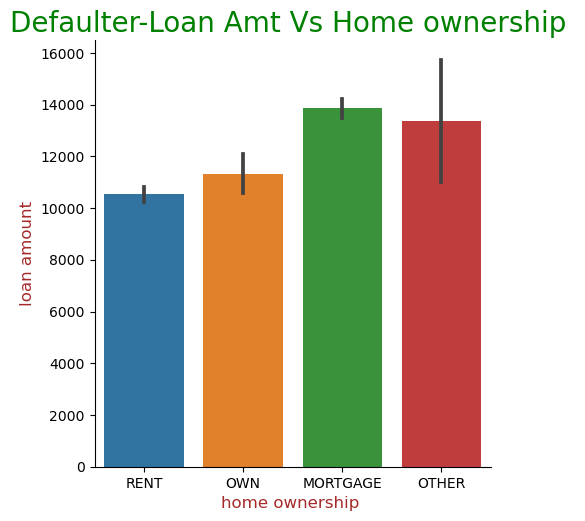

In [146]:
sns.catplot(x = 'home_ownership', y = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Home ownership ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("home ownership ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [147]:
#Most of the defaulters whose home ownership is 'MORTGAGE and have Loan amount of 14000

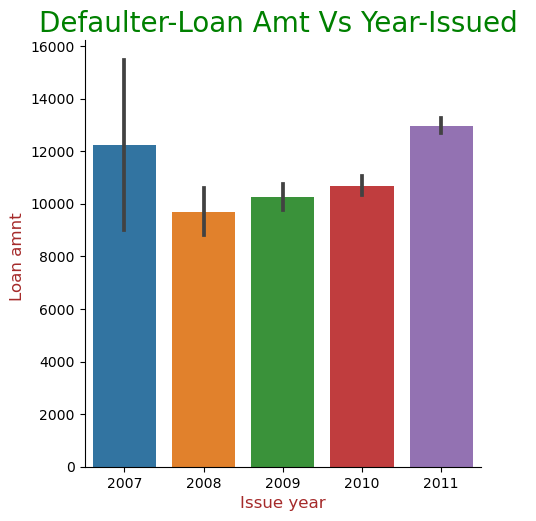

In [148]:
sns.catplot(x = 'issue_d_yr', y = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Year-Issued ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Loan amnt ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Issue year", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

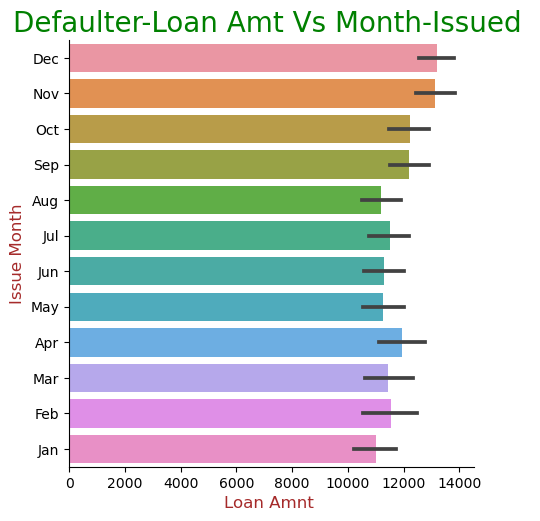

In [149]:

sns.catplot(y = 'issue_d_mth', x = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Month-Issued ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Amnt ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Issue Month", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [150]:
#Observations
#Most of the defaulted loans are in Month of Dec'2011.

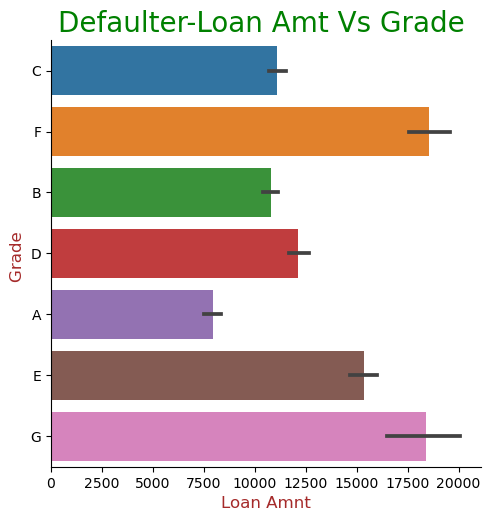

In [151]:
sns.catplot(y = 'grade', x = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Grade ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Grade ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Loan Amnt", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [152]:
#Observation
#When grade is F and loan amount is between 17k-20k

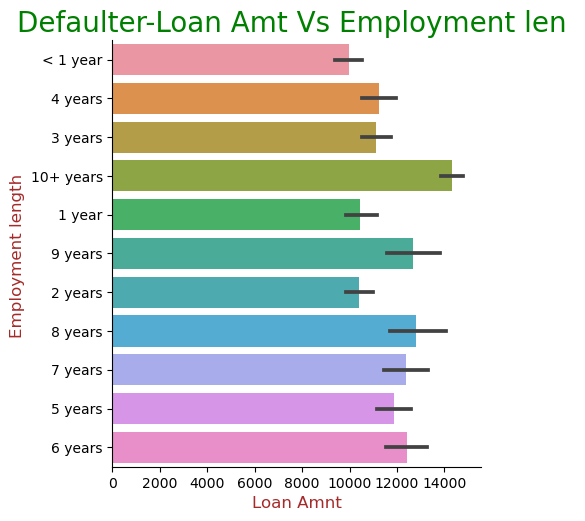

In [153]:
sns.catplot(y = 'emp_length', x = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Employment len ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Employment length ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Loan Amnt", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [154]:
#Observation
#Mostof the defaults have happened when the employees have 10+yrs experience and loan amount is 14k+

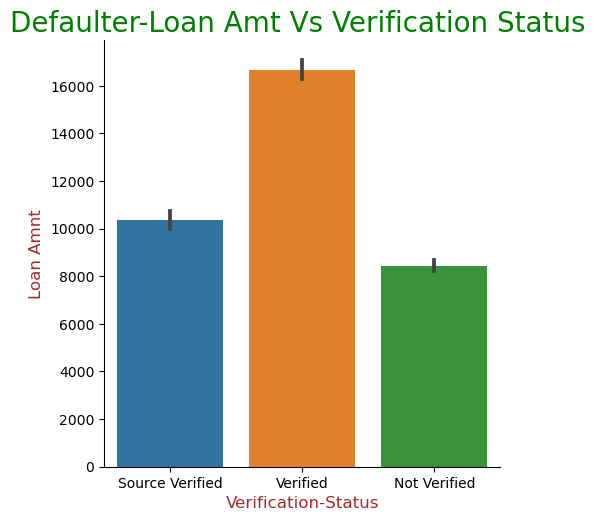

In [155]:
sns.catplot(x = 'verification_status', y = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Verification Status ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Verification-Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Amnt", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [156]:
#Observation
#Most of the defaulters had been verified and loan amount is above 16k

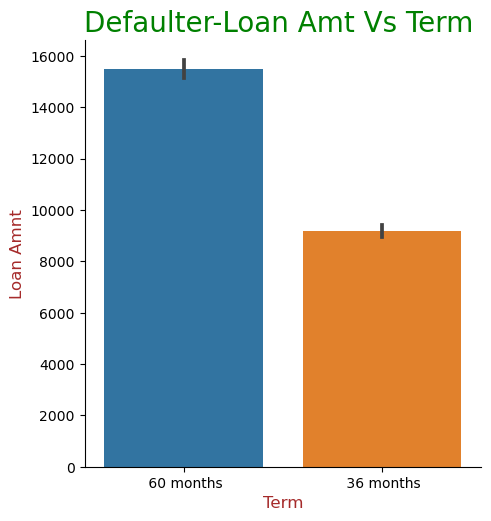

In [157]:
sns.catplot(x = 'term', y = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Term ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Amnt", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [158]:
#Observation
#Higher amount loans have tenure of  60 months.
